<a href="https://colab.research.google.com/github/parmidamardi/CDM-MatrixMonitor-FP/blob/main/CDM%E2%80%91MatrixMonitor%E2%80%91FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%pip install pandas numpy matplotlib seaborn openpyxl mlxtend scikit-learn ucimlrepo


[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris, fetch_openml

from ucimlrepo import fetch_ucirepo

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA, FastICA, TruncatedSVD

from sklearn.feature_selection import SelectKBest, f_regression, chi2, RFE

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error, silhouette_score


In [11]:
cancer = fetch_ucirepo(id=17)

X_cancer = cancer.data.features
y_cancer = cancer.data.targets

df_cancer = pd.concat([X_cancer, y_cancer], axis=1)

=== Breast Cancer Dataset ===
Shape: (569, 31)
Columns: ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3', 'Diagnosis']
        radius1  texture1  perimeter1    area1  smoothness1  compactness1  \
count    569.00    569.00      569.00   569.00       569.00        569.00   
unique      NaN       NaN         NaN      NaN          NaN           NaN   
top         NaN       NaN         NaN      NaN          NaN           NaN   
freq        NaN       NaN         NaN      NaN          NaN           NaN   
mean      14.13     19.29       91.97   654.89         0.10          0.10   
std        3.52      4.30       2

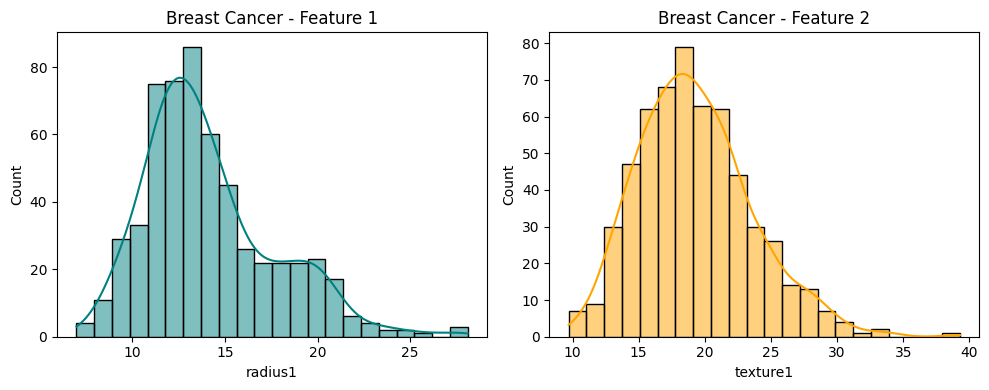

In [12]:
print("=== Breast Cancer Dataset ===")
print("Shape:", df_cancer.shape)
print("Columns:", list(df_cancer.columns))
print(df_cancer.describe(include='all').round(2), "\n")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_cancer.iloc[:, 0], kde=True, color='teal')
plt.title("Breast Cancer - Feature 1")

plt.subplot(1, 2, 2)
sns.histplot(df_cancer.iloc[:, 1], kde=True, color='orange')
plt.title("Breast Cancer - Feature 2")

plt.tight_layout()
plt.show()

In [13]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
df_boston = boston.frame


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


=== Boston Housing Dataset ===
Shape: (506, 14)
Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
          CRIM      ZN   INDUS CHAS     NOX      RM     AGE     DIS  RAD  \
count   506.00  506.00  506.00  506  506.00  506.00  506.00  506.00  506   
unique     NaN     NaN     NaN    2     NaN     NaN     NaN     NaN    9   
top        NaN     NaN     NaN    0     NaN     NaN     NaN     NaN   24   
freq       NaN     NaN     NaN  471     NaN     NaN     NaN     NaN  132   
mean      3.61   11.36   11.14  NaN    0.55    6.28   68.57    3.80  NaN   
std       8.60   23.32    6.86  NaN    0.12    0.70   28.15    2.11  NaN   
min       0.01    0.00    0.46  NaN    0.38    3.56    2.90    1.13  NaN   
25%       0.08    0.00    5.19  NaN    0.45    5.89   45.02    2.10  NaN   
50%       0.26    0.00    9.69  NaN    0.54    6.21   77.50    3.21  NaN   
75%       3.68   12.50   18.10  NaN    0.62    6.62   94.07    5.19  NaN   
m

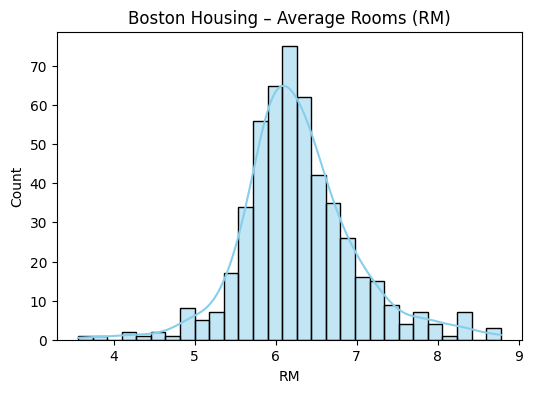

In [14]:
print("=== Boston Housing Dataset ===")
print("Shape:", df_boston.shape)
print("Columns:", list(df_boston.columns))
print(df_boston.describe(include='all').round(2), "\n")

plt.figure(figsize=(6, 4))
sns.histplot(df_boston["RM"], kde=True, color='skyblue')
plt.title("Boston Housing – Average Rooms (RM)")
plt.show()

In [15]:
iris = fetch_ucirepo(id=53)
X_iris = iris.data.features
y_iris = iris.data.targets
df_iris = pd.concat([X_iris, y_iris], axis=1)

=== Iris Dataset ===
Shape: (150, 5)
Columns: ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
        sepal length  sepal width  petal length  petal width        class
count         150.00       150.00        150.00       150.00          150
unique           NaN          NaN           NaN          NaN            3
top              NaN          NaN           NaN          NaN  Iris-setosa
freq             NaN          NaN           NaN          NaN           50
mean            5.84         3.05          3.76         1.20          NaN
std             0.83         0.43          1.76         0.76          NaN
min             4.30         2.00          1.00         0.10          NaN
25%             5.10         2.80          1.60         0.30          NaN
50%             5.80         3.00          4.35         1.30          NaN
75%             6.40         3.30          5.10         1.80          NaN
max             7.90         4.40          6.90         2.50        

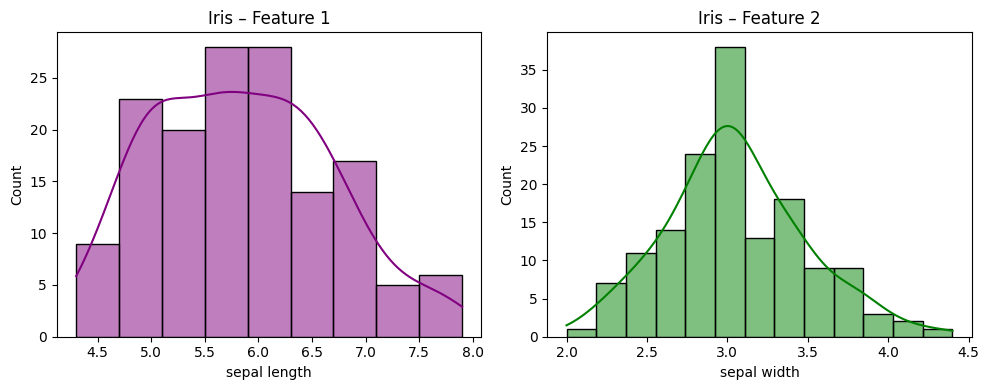

In [16]:
print("=== Iris Dataset ===")
print("Shape:", df_iris.shape)
print("Columns:", list(df_iris.columns))
print(df_iris.describe(include='all').round(2), "\n")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_iris.iloc[:, 0], kde=True, color='purple')
plt.title("Iris – Feature 1")
plt.subplot(1, 2, 2)
sns.histplot(df_iris.iloc[:, 1], kde=True, color='green')
plt.title("Iris – Feature 2")
plt.tight_layout()
plt.show()

/var/folders/n0/439bn76s15lbf8y11cgpn7qm0000gn/T/ipykernel_2246/3527835499.py:9: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


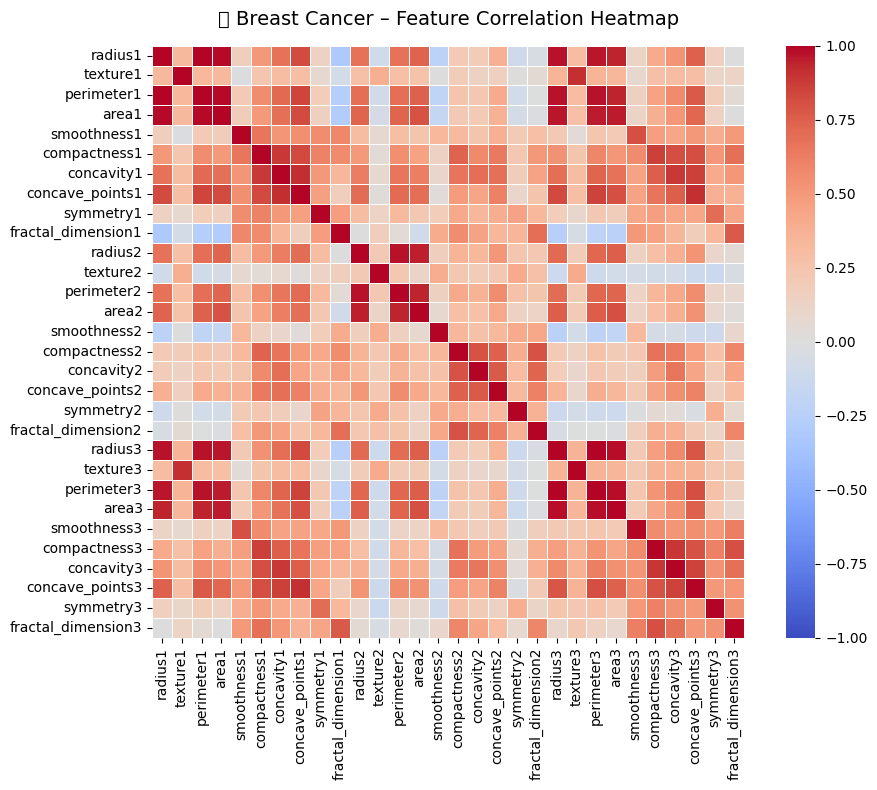

/var/folders/n0/439bn76s15lbf8y11cgpn7qm0000gn/T/ipykernel_2246/3527835499.py:9: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


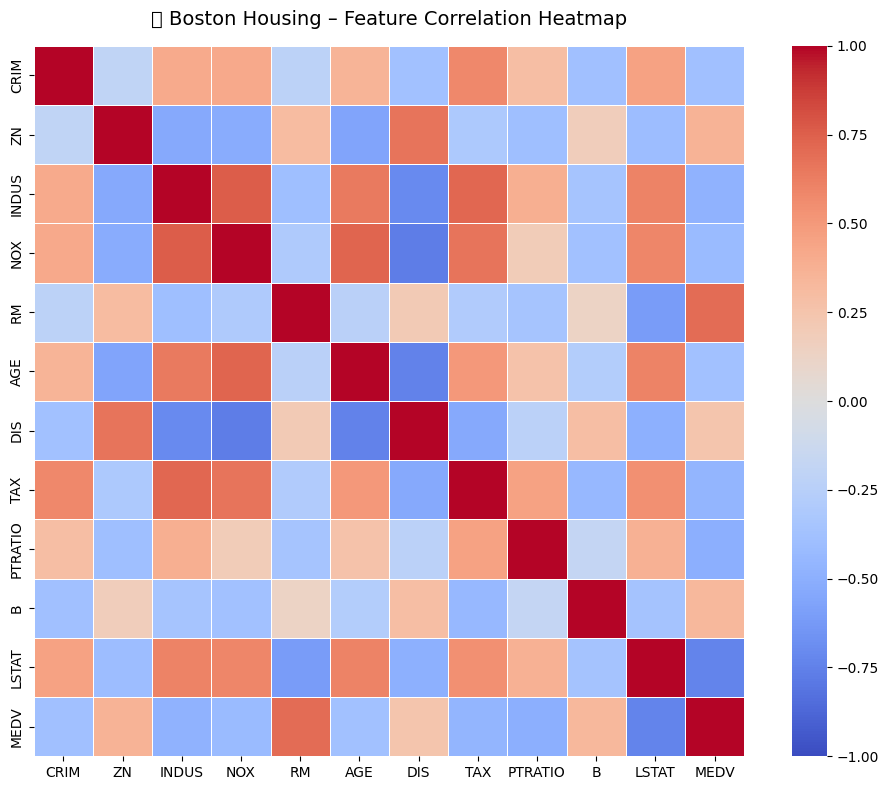

/var/folders/n0/439bn76s15lbf8y11cgpn7qm0000gn/T/ipykernel_2246/3527835499.py:9: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


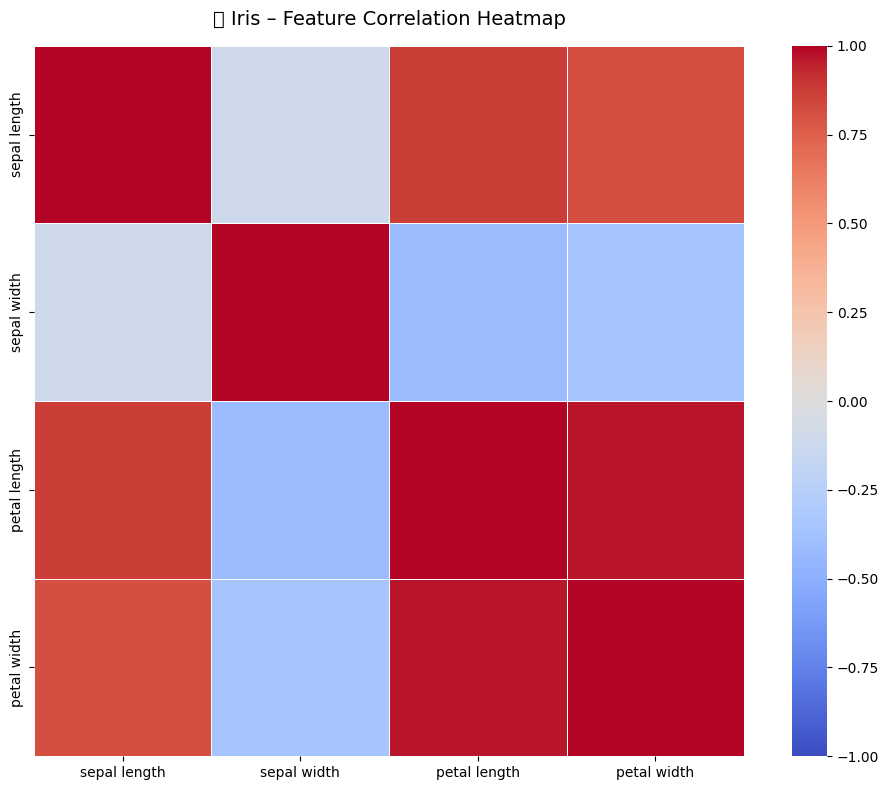

In [18]:
def plot_heatmap(df, title):
    plt.figure(figsize=(10, 8))
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    corr = numeric_df.corr()

    sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f", vmin=-1, vmax=1, square=True, linewidths=0.5)

    plt.title(title, fontsize=14, pad=15)
    plt.tight_layout()
    plt.show()


plot_heatmap(df_cancer, "🔬 Breast Cancer – Feature Correlation Heatmap")

plot_heatmap(df_boston, "🏠 Boston Housing – Feature Correlation Heatmap")

plot_heatmap(df_iris, "🌸 Iris – Feature Correlation Heatmap")


In [37]:
def run_dim_reduction(df, method_name, model):
    X = df.drop(columns=['target'])
    reduced = model.fit_transform(X)
    print(f"\n{method_name} for dataset ({df.shape[0]} samples, {df.shape[1]-1} features):")
    if hasattr(model, "explained_variance_ratio_"):
        print("  Explained variance ratios:", model.explained_variance_ratio_.round(4))
        print("  Cumulative variance:", model.explained_variance_ratio_.sum().round(4))
    else:
        print("  Explained variance not available (ICA)")
    return pd.DataFrame(reduced)


Breast Cancer Dataset

PCA for dataset (569 samples, 30 features):
  Explained variance ratios: [0.982]
  Cumulative variance: 0.982

ICA for dataset (569 samples, 30 features):
  Explained variance not available (ICA)

SVD for dataset (569 samples, 30 features):
  Explained variance ratios: [0.9744]
  Cumulative variance: 0.9744


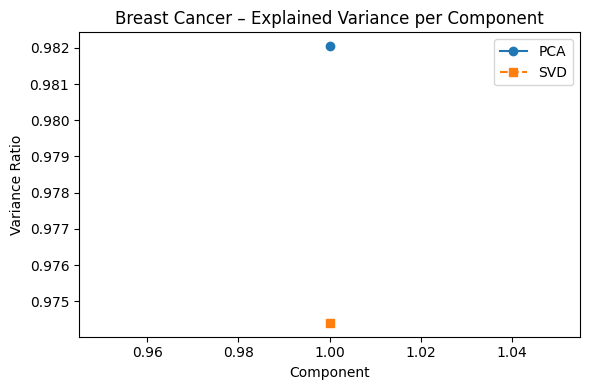


Diabetes Dataset

PCA for dataset (442 samples, 10 features):
  Explained variance ratios: [0.4024 0.1492 0.1206 0.0955 0.0662 0.0603 0.0537 0.0434]
  Cumulative variance: 0.9913

ICA for dataset (442 samples, 10 features):
  Explained variance not available (ICA)

SVD for dataset (442 samples, 10 features):
  Explained variance ratios: [0.4024 0.1492 0.1206 0.0955 0.0662 0.0603 0.0537 0.0434]
  Cumulative variance: 0.9913


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


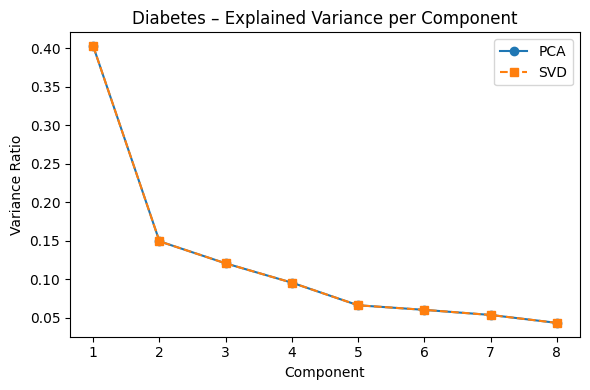


Iris Dataset

PCA for dataset (150 samples, 4 features):
  Explained variance ratios: [0.9246 0.0531]
  Cumulative variance: 0.9777

ICA for dataset (150 samples, 4 features):
  Explained variance not available (ICA)

SVD for dataset (150 samples, 4 features):
  Explained variance ratios: [0.5288 0.4485]
  Cumulative variance: 0.9772


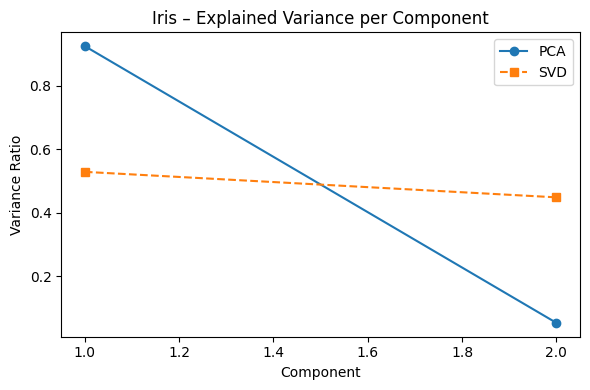

In [38]:
datasets = {
    "Breast Cancer": df_cancer,
    "Diabetes": df_diabetes,
    "Iris": df_iris
}

for name, df in datasets.items():
    print(f"\n{'='*50}\n{name} Dataset")

    # PCA
    pca = PCA(n_components=0.95)
    df_pca = run_dim_reduction(df, "PCA", pca)

    # ICA
    n_comp = df_pca.shape[1]
    ica = FastICA(n_components=n_comp, random_state=42)
    df_ica = run_dim_reduction(df, "ICA", ica)

    # SVD
    svd = TruncatedSVD(n_components=n_comp)
    df_svd = run_dim_reduction(df, "SVD", svd)

    plt.figure(figsize=(6,4))
    plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
             pca.explained_variance_ratio_, "o-", label="PCA")
    plt.plot(range(1, len(svd.explained_variance_ratio_)+1),
             svd.explained_variance_ratio_, "s--", label="SVD")
    plt.title(f"{name} – Explained Variance per Component")
    plt.xlabel("Component")
    plt.ylabel("Variance Ratio")
    plt.legend()
    plt.tight_layout()
    plt.show()



Breast Cancer Dataset – Feature Selection

[SelectKBest] Selected Features (15): ['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']


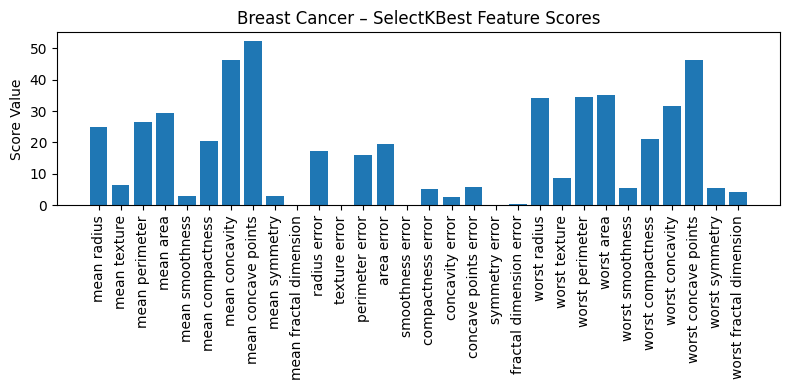

[RFE] Selected Features (15): ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'radius error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points', 'worst symmetry']

Overlap between SelectKBest & RFE: ['mean radius', 'radius error', 'mean concavity', 'mean perimeter', 'mean concave points', 'worst concave points', 'mean area', 'worst perimeter', 'worst concavity', 'worst area', 'worst radius']

Diabetes Dataset – Feature Selection

[SelectKBest] Selected Features (5): ['bmi', 'bp', 's3', 's4', 's5']


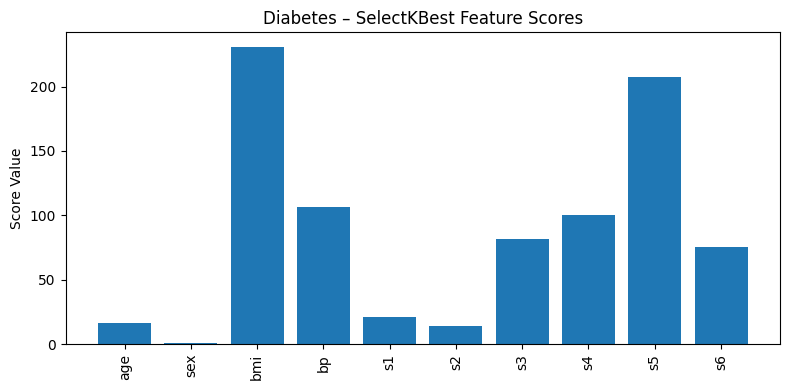

[RFE] Selected Features (5): ['bmi', 'bp', 's1', 's2', 's5']

Overlap between SelectKBest & RFE: ['bmi', 'bp', 's5']

Iris Dataset – Feature Selection

[SelectKBest] Selected Features (2): ['petal length (cm)', 'petal width (cm)']


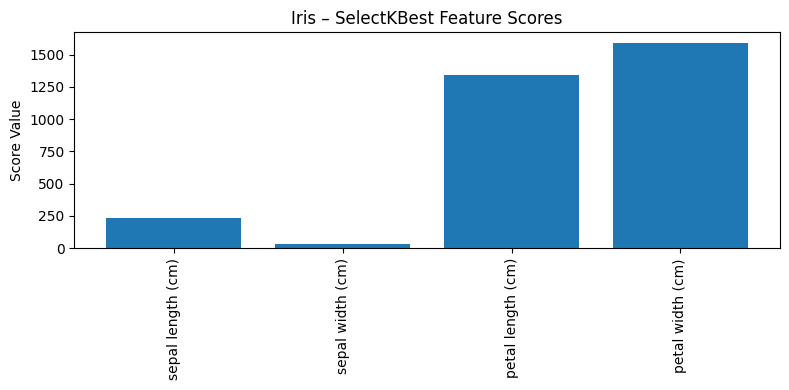

[RFE] Selected Features (2): ['petal length (cm)', 'petal width (cm)']

Overlap between SelectKBest & RFE: ['petal length (cm)', 'petal width (cm)']


In [39]:
for name, df in datasets.items():
    print(f"\n{'='*50}\n{name} Dataset – Feature Selection")

    X = df.drop(columns=['target'])
    y = df['target']

    if name == "Breast Cancer":
        score_func = chi2
        model = LogisticRegression(max_iter=1000)
    elif name == "Diabetes":
        score_func = f_regression
        model = LinearRegression()
    else:
        score_func = f_regression
        model = LinearRegression()

    X_scaled = MinMaxScaler().fit_transform(X)

    # --- SelectKBest ---
    selector = SelectKBest(score_func=score_func, k=int(X.shape[1]/2))
    X_selected = selector.fit_transform(X_scaled, y)
    selected_features = X.columns[selector.get_support()]
    scores = selector.scores_

    print(f"\n[SelectKBest] Selected Features ({len(selected_features)}): {list(selected_features)}")

    plt.figure(figsize=(8,4))
    plt.bar(X.columns, scores)
    plt.xticks(rotation=90)
    plt.title(f"{name} – SelectKBest Feature Scores")
    plt.ylabel("Score Value")
    plt.tight_layout()
    plt.show()

    # --- RFE ---
    rfe = RFE(estimator=model, n_features_to_select=int(X.shape[1]/2))
    rfe.fit(X_scaled, y)
    rfe_features = X.columns[rfe.support_]

    print(f"[RFE] Selected Features ({len(rfe_features)}): {list(rfe_features)}")

    overlap = set(selected_features) & set(rfe_features)
    print(f"\nOverlap between SelectKBest & RFE: {list(overlap)}")

In [41]:
def evaluate_classification(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, pred),
        "F1": f1_score(y_test, pred)
    }

def evaluate_regression(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return {
        "R²": r2_score(y_test, pred),
        "RMSE": mean_squared_error(y_test, pred, squared=False)
    }

def evaluate_clustering(model, X):
    labels = model.fit_predict(X)
    return {"Silhouette": silhouette_score(X, labels)}

In [42]:
results = {}

for name, df in datasets.items():
    print(f"\n{'='*60}\n{name} – Training & Optimization")

    X = df.drop(columns=['target'])
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42
    )

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if name == "Breast Cancer":
        model = RandomForestClassifier(random_state=42)
        res_main = evaluate_classification(model, X_scaled, X_test_scaled, y_train, y_test)

    elif name == "Diabetes":
        model = RandomForestRegressor(random_state=42)
        res_main = evaluate_regression(model, X_scaled, X_test_scaled, y_train, y_test)

    else:
        model = KMeans(n_clusters=3, random_state=42)
        res_main = evaluate_clustering(model, scaler.fit_transform(X))

    pca = PCA(n_components=0.95)
    X_pca_train = pca.fit_transform(X_scaled)
    X_pca_test = pca.transform(X_test_scaled)
    if name == "Breast Cancer":
        model = RandomForestClassifier(random_state=42)
        res_pca = evaluate_classification(model, X_pca_train, X_pca_test, y_train, y_test)
    elif name == "Diabetes":
        model = RandomForestRegressor(random_state=42)
        res_pca = evaluate_regression(model, X_pca_train, X_pca_test, y_train, y_test)
    else:
        model = KMeans(n_clusters=3, random_state=42)
        res_pca = evaluate_clustering(model, scaler.fit_transform(X_pca_train))

    if name == "Breast Cancer":
        select = SelectKBest(score_func=chi2, k=int(X.shape[1]/2))
        X_sel_train = select.fit_transform(np.abs(X_scaled), y_train)
        X_sel_test = select.transform(np.abs(X_test_scaled))
        model = LogisticRegression(max_iter=1000)
        res_sel = evaluate_classification(model, X_sel_train, X_sel_test, y_train, y_test)

    elif name == "Diabetes":
        select = SelectKBest(score_func=f_regression, k=int(X.shape[1]/2))
        X_sel_train = select.fit_transform(X_scaled, y_train)
        X_sel_test = select.transform(X_test_scaled)
        model = LinearRegression()
        res_sel = evaluate_regression(model, X_sel_train, X_sel_test, y_train, y_test)

    else:
        select = SelectKBest(score_func=f_regression, k=int(X.shape[1]/2))
        X_sel = select.fit_transform(scaler.fit_transform(X), y)
        model = KMeans(n_clusters=3, random_state=42)
        res_sel = evaluate_clustering(model, X_sel)

    results[name] = {"Main": res_main, "PCA": res_pca, "Selected": res_sel}



Breast Cancer – Training & Optimization

Diabetes – Training & Optimization

Iris – Training & Optimization


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Breast Cancer Results Comparison:
 Main: {'Accuracy': 0.965034965034965, 'F1': 0.9720670391061451}
 PCA: {'Accuracy': 0.958041958041958, 'F1': 0.9659090909090908}
 Selected: {'Accuracy': 0.7762237762237763, 'F1': 0.831578947368421}


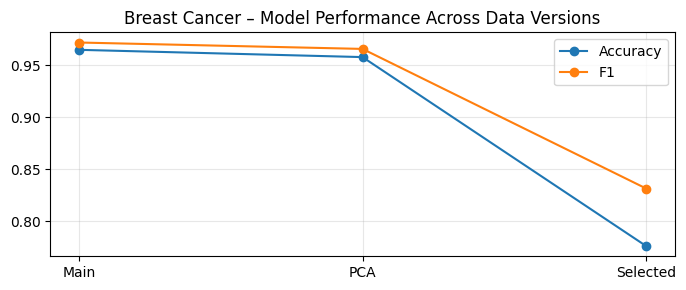


Diabetes Results Comparison:
 Main: {'R²': 0.45547329638673595, 'RMSE': 54.87316063120164}
 PCA: {'R²': 0.4792588589932838, 'RMSE': 53.66131730375965}
 Selected: {'R²': 0.47686421388800526, 'RMSE': 53.784557443406}


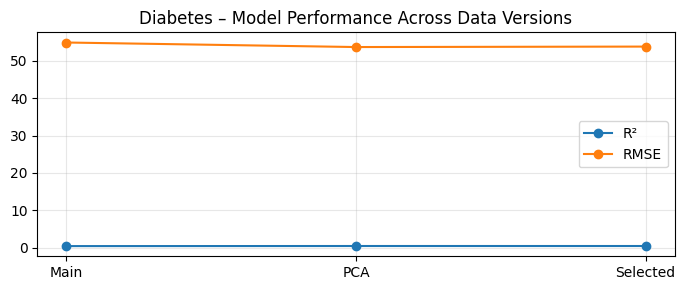


Iris Results Comparison:
 Main: {'Silhouette': 0.45994823920518635}
 PCA: {'Silhouette': 0.48948180200627917}
 Selected: {'Silhouette': 0.6741313114151009}


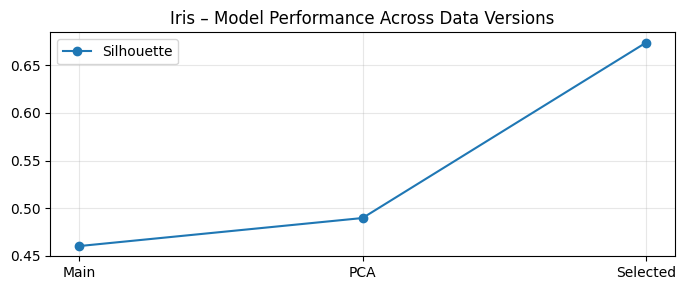

In [43]:
for name, metrics in results.items():
    print(f"\n{name} Results Comparison:")
    for version, vals in metrics.items():
        print(f" {version}: {vals}")

    plt.figure(figsize=(7,3))
    keys = list(metrics["Main"].keys())
    for k in keys:
        vals = [metrics[v].get(k, np.nan) for v in metrics]
        plt.plot(["Main", "PCA", "Selected"], vals, marker='o', label=k)
    plt.title(f"{name} – Model Performance Across Data Versions")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()